In [69]:
# -*- coding: utf-8 -*-
from matplotlib import pylab
import csv
%matplotlib inline

with open("data.csv", "r") as f_obj:
    reader = csv.DictReader(f_obj, delimiter=';')
    months_produced = [[0 for i in range(7)] for j in range (2)]
    months_defects = [[[0 for i in range(7)] for j in range (7)] for k in range (2)]
    for i in reader:
        prod_day = int(i['production.date']) - 1
        report_day = int(i['report.date']) - 1
        produced = float(i['produced'])
        defects = float(i['defects'])
        if (i['supplier'] == 'harpy.co'):
            months_produced[0][prod_day] += produced
            months_defects[0][report_day][prod_day] += defects
        else:
            months_produced[1][prod_day] += produced
            months_defects[1][report_day][prod_day] += defects
    x = [[] for i in range (6)]
    y = [[[] for i in range (7)] for j in range(2)]
    
    ysum = [[], []]
    for i in range(6):
        for j in range(i, 7):
            y[0][i].append(months_defects[0][j][i] / months_produced[0][i])
            y[1][i].append(months_defects[1][j][i] / months_produced[1][i])
            x[i].append(j)
            
    for i in range(7):
        if i != 0:
            ysum[0].append(ysum[0][-1] + months_defects[0][i][0] / months_produced[0][0])
            ysum[1].append(ysum[1][-1] + months_defects[1][i][0] / months_produced[1][0])
        else:
            ysum[0].append(0)
            ysum[1].append(0)
            
    yd = []
    for i in range(7):
        d0 = 0
        d1 = 0
        for j in range(6):
            d0 += months_defects[0][i][j]
            d1 += months_defects[1][i][j]
        if i == 0:
            yd.append(0)
        else:
            yd.append(yd[-1])
        
        yd[-1] += months_produced[0][i] - d0
        yd[-1] -= months_produced[1][i] - d1
        
        

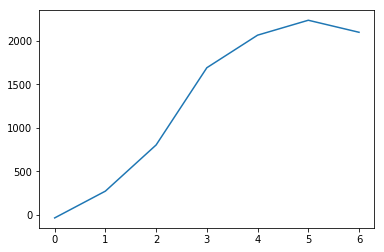

In [70]:
pylab.plot(x[0], yd)

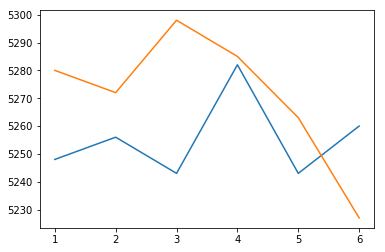

In [71]:
pylab.plot(x[1], months_produced[0][:-1])
pylab.plot(x[1], months_produced[1][:-1])

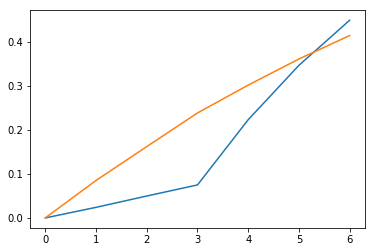

In [72]:
pylab.plot(x[0], ysum[0])
pylab.plot(x[0], ysum[1])

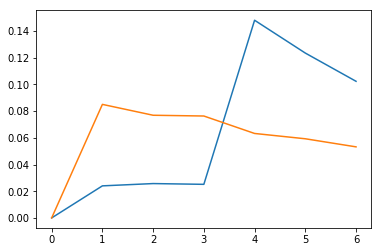

In [73]:
i = 0
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])

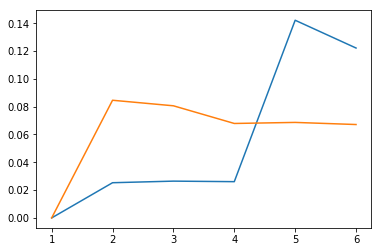

In [74]:
i = 1
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])

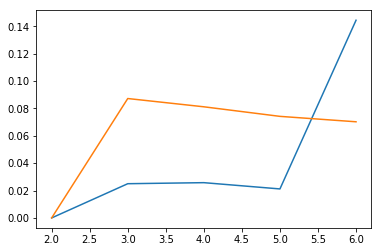

In [75]:
i = 2
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])

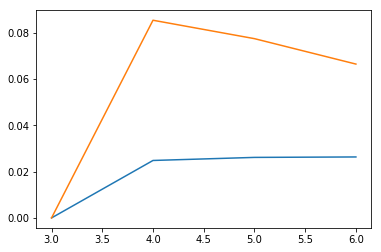

In [76]:
i = 3
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])

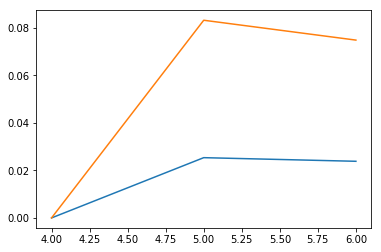

In [77]:
i = 4
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])

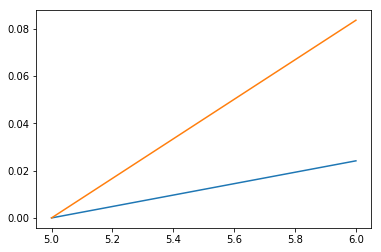

In [78]:
i = 5
pylab.plot(x[i], y[0][i])
pylab.plot(x[i], y[1][i])